In [1]:
from trawl_sinn import  *
import matplotlib.pyplot as plt
import numpy as np

In [11]:
process = GaussianTrawlProcess(integrated_trawl_function = lambda x: torch.exp(-x))
times = torch.linspace(0, 50, 1001)

In [13]:
data = process.sample(times, batch_size = 500)

## Plot ACF and PDF

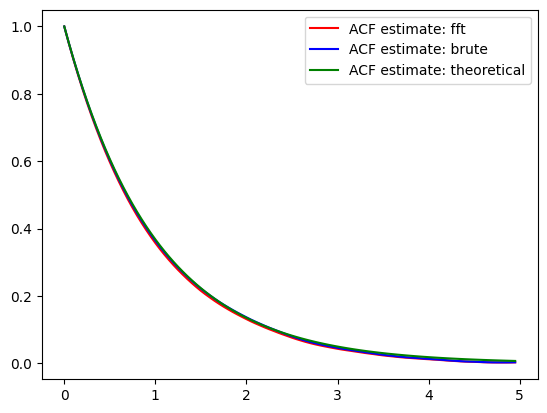

In [14]:
LAGS = 100
plt.plot(times[:LAGS].numpy(), acf(data, lags = LAGS, method = 'fft').numpy(), color='r', label='ACF estimate: fft')
plt.plot(times[:LAGS].numpy(), acf(data, lags = LAGS, method = 'brute').numpy(), color='b', label='ACF estimate: brute')
plt.plot(times[:LAGS].numpy(), process.acf(times[:LAGS]).numpy(), color='g', label='ACF estimate: theoretical')
plt.legend()

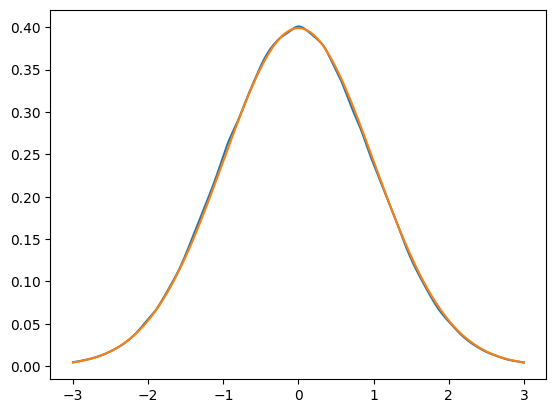

In [15]:
plt.plot(torch.linspace(-3, 3, 1000).numpy(), gaussian_kde(data, lower = -3, upper = 3, n = 1000).numpy())
plt.plot(torch.linspace(-3, 3, 1000).numpy(), process.pdf(torch.linspace(-3, 3, 1000)).numpy())

## Create basic loss

Analytical loss:

In [16]:
fdd = process.at_times(times)
loss_kde = DensityLoss.analytical(fdd, lower = -2.0, upper = 2.0, n = 400)
loss_acf = ACFLoss.analytical(fdd, lags = 100)
loss = 2 * loss_acf + loss_kde

data = fdd.sample(batch_size = 500)
print('ACF loss:', loss_acf(data), 'KDE loss:', loss_kde(data), 'Total:', loss(data))

ACF loss: tensor(1.5399e-05) KDE loss: tensor(9.6866e-06) Total: tensor(4.0484e-05)


Loss built from data:

In [7]:
target_data = fdd.sample(batch_size = 5000)

loss_kde_emp = DensityLoss.empirical(target_data, lower = -2.0, upper = 2.0, n = 100)
loss_acf_emp = ACFLoss.empirical(target_data, lags = 100, method = 'brute')
loss_emp = loss_acf_emp + loss_kde_emp

data = fdd.sample(batch_size = 250)
print('ACF loss:', loss_acf_emp(data), 'KDE loss:', loss_kde_emp(data), 'Total:', loss_emp(data))

ACF loss: tensor(1.9314e-05) KDE loss: tensor(2.1688e-06) Total: tensor(2.1483e-05)


## Losses based on charfuncs

In [17]:
cfloss = CFRollingWindowLoss.analytical(process = process, times = times)

In [18]:
cfloss(target_data)

tensor(391.7381)